In [1]:
# dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# csv path saved to variable-- will need to chaange the final directory
data = "~/Desktop/Construction_Permits_Issued_since_2010.csv"

# Read and display the CSV with Pandas
development_data_pd = pd.read_csv(data)

C:\Users\Honky\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (25,26,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# filter to past 5 years
filtered_5y_DF = development_data_pd.loc[development_data_pd['CalendarYearIssued'] >= 2013, : ]

In [14]:
# Reduce data points
reduced_5yr_DF = filtered_5y_DF[[
    'PermitTypeDesc', 
    'PermitClass', 
    'WorkClass', 
    'Condominium', 
    'IssuedDate', 
    'CalendarYearIssued', 
    'StatusCurrent',
    'OriginalAddress1',
    'OriginalCity',
    'OriginalZip',
    'ProjectID',
    'Latitude',
    'Longitude',
    'Location']]

# filter data to 'StatusSurrent = Final' for analyses of ACTIVE OR COMPLETED PROJECTS
# reset index and drop original index
filter_status = reduced_5yr_DF.loc[(reduced_5yr_DF['StatusCurrent'] == 'Final') | (reduced_5yr_DF['StatusCurrent'] == 'Active'), : ].reset_index(drop=True)

# filtered out 'sign permits'
final_5y_DF = filter_status.loc[filter_status['PermitClass'] != 'Sign Permit', : ]

# re-code 'permitClass' to standardized values
# this creates 1 new series coded with T/F for 'begins with C'
final_5y_DF['PermitClass_Commercial'] = final_5y_DF.PermitClass.str.startswith('C')
final_5y_DF['PermitClass_Residential'] = final_5y_DF.PermitClass.str.startswith('R')

final_5y_DF['StatusCurrent'].value_counts()

C:\Users\Honky\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Honky\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Final     294645
Active     35002
Name: StatusCurrent, dtype: int64

In [17]:
# extracting commerical projects per year
commercial_df = final_5y_DF.loc[final_5y_DF['PermitClass_Commercial'] == True, : ]
commercial_grouped = commercial_df.groupby("CalendarYearIssued")
comm_count = commercial_grouped['PermitClass_Commercial'].count()
comm_list = comm_count.tolist()
years = comm_count.keys()

comm_count

CalendarYearIssued
2013    17210
2014    15697
2015    15899
2016    14393
2017    14769
2018    11032
Name: PermitClass_Commercial, dtype: int64

In [26]:
# extracting residential projects per year
residential_df = final_5y_DF.loc[final_5y_DF['PermitClass_Residential'] == True, : ]
residential_grouped = residential_df.groupby("CalendarYearIssued")
res_count = residential_grouped['PermitClass_Residential'].count()
res_list = res_count.tolist()
res_count

CalendarYearIssued
2013    37433
2014    38748
2015    38614
2016    44486
2017    46855
2018    34510
Name: PermitClass_Residential, dtype: int64

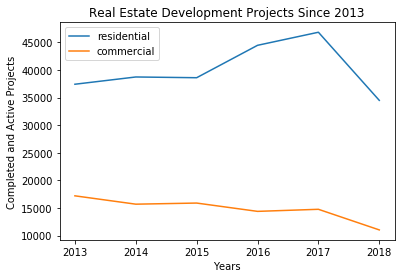

In [36]:
# plot data
plt.plot(years, res_list, label = 'residential')
plt.plot(years, comm_list, label = 'commercial')

# plot elements
plt.title("Real Estate Development Projects Since 2013")
plt.xlabel("Years")
plt.ylabel("Completed and Active Projects")
plt.legend(loc='best')
plt.show()

# need to add line to export as image